In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///hybridassistant.db")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['AVERAGED',
 'BATTLOG',
 'FASTLOG',
 'HVCHECK',
 'HVCHECKCELL',
 'HVCHECKTEMPERATURE',
 'NOTES',
 'PALETTE',
 'PREFERENCE',
 'STAT',
 'STATE',
 'TRIPINFO',
 'TRIPS']

In [5]:
Fastlog = Base.classes.FASTLOG
Averaged = Base.classes.AVERAGED
Palette = Base.classes.PALETTE
Preference = Base.classes.PREFERENCE
Stat = Base.classes.STAT
State = Base.classes.STATE
Tripinfo = Base.classes.TRIPINFO
Trips = Base.classes.TRIPS

In [6]:
session = Session(engine)

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['AVERAGED',
 'BATTLOG',
 'FASTLOG',
 'HVCHECK',
 'HVCHECKCELL',
 'HVCHECKTEMPERATURE',
 'NOTES',
 'PALETTE',
 'PREFERENCE',
 'STAT',
 'STATE',
 'TRIPINFO',
 'TRIPS']

In [8]:
columns = inspector.get_columns('AVERAGED')
for c in columns:
    print(c['name'], c["type"])

TIMESTAMP INTEGER
ID INTEGER
KEY REAL
VALUE REAL
SAMPLES INTEGER


In [11]:
columns = inspector.get_columns('FASTLOG')
for c in columns:
    print(c['name'], c["type"])

TIMESTAMP INTEGER
RPS INTEGER
ODO REAL
SPEED_OBD REAL
GPS_LAT REAL
GPS_LON REAL
GPS_SPEED REAL
GPS_ALT REAL
HV_V REAL
HV_A REAL
SOC REAL
ICE_TEMP INTEGER
ICE_RPM INTEGER
ICE_PWR REAL
BRK_REG_TRQ REAL
BRK_MCYL_TRQ REAL
TRIP_NBS INTEGER
TRIP_EV_NBS INTEGER
TRIP_MOV_NBS INTEGER
TRIP_DIST REAL
TRIP_EV_DIST REAL
HSI INTEGER
MG2_RPM INTEGER
IGN REAL
LTFT REAL
STFT REAL
TRIPFUEL REAL
FUELFLOWH REAL
DCL REAL
CCL REAL
BSFC INTEGER
ICE_LOAD INTEGER
INVERTER_TEMP INTEGER
BATTERY_TEMP INTEGER
MG_TEMP INTEGER
INHALING_TEMP INTEGER
AMBIENT_TEMP INTEGER
ROOM_TEMP INTEGER
MG2_TORQUE INTEGER
MG1_RPM INTEGER
MG1_TORQUE INTEGER
MGR_RPM INTEGER
MGR_TORQUE INTEGER
GLIDEINDEX REAL
ACCELERATOR INTEGER
POSITIVEKWH REAL
NEGATIVEKWH REAL


In [13]:
columns = inspector.get_columns('PALETTE')
for c in columns:
    print(c['name'], c["type"])

name TEXT
value INTEGER


In [14]:
columns = inspector.get_columns('PREFERENCE')
for c in columns:
    print(c['name'], c["type"])

BT_Macadr TEXT
Nbcells INTEGER
CarModel INTEGER
TextSize REAL
MaxTrips INTEGER
AutoClose INTEGER
FuelDisplay INTEGER
SpeedCorrectionFactor REAL
FuelChartDisplay INTEGER
HighPrecisionFuelChart INTEGER
FanStartTemperature INTEGER
Brightness INTEGER
AutoEnableBluetooth INTEGER
LeaveBluetoothEnabled INTEGER
LastVersionCode INTEGER
DisclaimerAccepted INTEGER
AutoSpeedCorrection INTEGER
UseFahrenheit INTEGER
UseMiles INTEGER
UseGallons INTEGER
DisplayTimeInMotion INTEGER
DebugOBD INTEGER
DebugState INTEGER
SkipBTCheck INTEGER
HighSpeedLogging INTEGER
ConnectionMode TEXT
E85Correction INTEGER
Tip_BluetoothNotconnected INTEGER
CurrentLanguage INTEGER
AutoScreenshot INTEGER
Tip_FirmwareWarning INTEGER
EVIntensive INTEGER
DontSendReports INTEGER
FlashBorder INTEGER
UseImperial INTEGER
IgnoreChargerOnAutoClose INTEGER
FanAssistant INTEGER
FanStopTemperature INTEGER
ProbeEnabled INTEGER
OdoInMiles INTEGER
PixelFilter INTEGER
GlideAssistant INTEGER
GlideAssistantMG2 INTEGER
PanelAssistant INTEGER
A

In [15]:
columns = inspector.get_columns('STAT')
for c in columns:
    print(c['name'], c["type"])

TIMESTAMP INTEGER
STAT INTEGER
START REAL
END REAL
MIN REAL
MAX REAL
AVG REAL
VARIANCE REAL


In [16]:
columns = inspector.get_columns('STATE')
for c in columns:
    print(c['name'], c["type"])

TIMESTAMP INTEGER
STATE INTEGER
MAXLENGTH INTEGER
PERCENT REAL


In [17]:
columns = inspector.get_columns('TRIPINFO')
for c in columns:
    print(c['name'], c["type"])

TIMESTAMP INTEGER
CARMODEL INTEGER
VIN TEXT
VERSIONCODE INTEGER
NUMSAMPLES INTEGER
CONNECTIONMODE INTEGER
MAC TEXT
NAME TEXT
MANUFACTURER TEXT
KWHPOS REAL
KWHNEG REAL
ICE_KWH REAL
EXCESSIVE_EV INTEGER
NUMBRAKES INTEGER
NUMBADBRAKES INTEGER
NUMHALFBRAKES INTEGER
REGENKWH REAL
ACCELRATING REAL
IGN INTEGER
INEFFIGN INTEGER
SOCGAINBRAKING REAL
SOCGAINCOASTING REAL
SOCGAINICE REAL
FIRMWARE TEXT
DISCONNECTIONS INTEGER
CorruptedFrames INTEGER
TotalFrames INTEGER
GlideType INTEGER


In [18]:
columns = inspector.get_columns('TRIPS')
for c in columns:
    print(c['name'], c["type"])

TSDEB INTEGER
TSFIN INTEGER
NBSEC INTEGER
NKMS INTEGER


In [19]:
conn = engine.connect()

In [20]:
fastlog_df = pd.read_sql("SELECT * FROM FASTLOG", conn) 

avg_df = pd.read_sql("SELECT * FROM AVERAGED", conn)

palette_df = pd.read_sql("SELECT * FROM PALETTE", conn)

pref_df = pd.read_sql("SELECT * FROM PREFERENCE", conn)

stat_df = pd.read_sql("SELECT * FROM STAT", conn)

state_df = pd.read_sql("SELECT * FROM STATE", conn)

tripinfo_df = pd.read_sql("SELECT * FROM TRIPINFO", conn)

trips_df = pd.read_sql("SELECT * FROM TRIPS", conn)

In [21]:
fastlog_df.describe(include='all')

,TIMESTAMP,RPS,ODO,SPEED_OBD,GPS_LAT,GPS_LON,GPS_SPEED,GPS_ALT,HV_V,HV_A,...,ROOM_TEMP,MG2_TORQUE,MG1_RPM,MG1_TORQUE,MGR_RPM,MGR_TORQUE,GLIDEINDEX,ACCELERATOR,POSITIVEKWH,NEGATIVEKWH
count,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06,...,1836840.0,1.836840e+06,1.836840e+06,1.836840e+06,1836840.0,1836840.0,1.836840e+06,1.836840e+06,1.836840e+06,1.836840e+06
mean,1.557627e+12,2.905068e+00,8.650450e+03,2.587241e+01,4.388368e+01,-9.109511e+01,2.741127e+01,2.426225e+02,2.274356e+02,-5.641645e-01,...,-500.0,-2.764865e+00,-4.038611e+02,-5.350906e+00,0.0,0.0,4.613677e-01,8.084659e+00,5.111357e-01,-6.589105e-02
std,3.323814e+09,4.692313e+00,4.986380e+03,4.042916e+01,6.968719e+00,1.446633e+01,3.852551e+01,4.319752e+01,7.355151e+00,1.405454e+01,...,0.0,3.486672e+01,1.872865e+03,9.714880e+00,0.0,0.0,6.222008e+00,1.403196e+01,3.680004e+00,2.181115e-01
min,1.554586e+12,0.000000e+00,1.629000e+03,0.000000e+00,0.000000e+00,-9.376837e+01,0.000000e+00,-5.000000e+00,0.000000e+00,-1.240000e+02,...,-500.0,-2.456250e+02,-7.755000e+03,-3.800000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-1.774608e+00
25%,1.554925e+12,0.000000e+00,3.861000e+03,0.000000e+00,4.498323e+01,-9.347433e+01,0.000000e+00,2.360000e+02,2.240000e+02,0.000000e+00,...,-500.0,-5.375000e+00,-2.730000e+02,-7.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.555977e+12,0.000000e+00,6.525000e+03,0.000000e+00,4.499380e+01,-9.331016e+01,9.000000e+00,2.410000e+02,2.280000e+02,0.000000e+00,...,-500.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.560439e+12,7.000000e+00,1.362300e+04,4.900000e+01,4.499524e+01,-9.331007e+01,4.500000e+01,2.630000e+02,2.320000e+02,0.000000e+00,...,-500.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00
max,1.565449e+12,4.200000e+01,1.433400e+04,1.570000e+02,4.511108e+01,0.000000e+00,1.570000e+02,3.800000e+02,2.800000e+02,1.780000e+02,...,-500.0,3.993750e+02,1.007400e+04,4.500000e+01,0.0,0.0,1.000000e+02,1.000000e+02,1.316681e+02,0.000000e+00


In [22]:
avg_df.describe(include='all')

,TIMESTAMP,ID,KEY,VALUE,SAMPLES
count,2.624700e+04,26247.000000,26247.000000,26247.000000,26247.000000
mean,1.560578e+12,1.573285,56.006401,-6.328345,3.263763
std,2.927964e+09,0.494610,32.023585,6.988710,3.836088
min,1.554587e+12,1.000000,0.000000,-28.768000,1.000000
25%,1.558389e+12,1.000000,30.000000,-10.964389,1.000000
50%,1.560776e+12,2.000000,52.000000,-4.796800,2.000000
75%,1.562969e+12,2.000000,81.000000,-1.508857,4.000000
max,1.565449e+12,2.000000,154.000000,23.896000,57.000000


In [23]:
palette_df.describe(include='all')

,name,value
count,23,2.300000e+01
unique,23,NaN
top,ColorBSFCMed,NaN
freq,1,NaN
mean,NaN,-7.596871e+06
std,NaN,7.786270e+06
min,NaN,-1.674445e+07
25%,NaN,-1.671168e+07
50%,NaN,-4.194304e+06
75%,NaN,-6.540850e+04


In [25]:
pref_df.describe(include='all')

,BT_Macadr,Nbcells,CarModel,TextSize,MaxTrips,AutoClose,FuelDisplay,SpeedCorrectionFactor,FuelChartDisplay,HighPrecisionFuelChart,...,AlternativeFuelCalc,AutoHUD,AutoHUDReverse,WiFiIP,AutoOdo,Immersive,ScrollLeftToRight,WiFiPort,CarDetect,PowerChartDisplay
count,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
top,00:04:3E:9B:AF:A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,192.168.0.10,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,NaN,1.0,0.0,1.0,35000.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,NaN,1.0,0.0,1.0,35000.0,0.0,0.0
25%,NaN,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,NaN,1.0,0.0,1.0,35000.0,0.0,0.0
50%,NaN,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,NaN,1.0,0.0,1.0,35000.0,0.0,0.0
75%,NaN,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,NaN,1.0,0.0,1.0,35000.0,0.0,0.0


In [26]:
stat_df.describe(include='all')

,TIMESTAMP,STAT,START,END,MIN,MAX,AVG,VARIANCE
count,2.520000e+03,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2.520000e+03
mean,1.560591e+12,17.250000,7.638889,8.845343,2.134387,86.357899,8.221573,2.335765e+03
std,2.923927e+09,9.374916,13.387231,15.552163,34.567708,3328.654544,14.342881,1.166489e+05
min,1.554587e+12,8.000000,-26.352000,-1.392000,-327.000000,0.000000,-2.567828,0.000000e+00
25%,1.558441e+12,12.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.560790e+12,15.500000,0.000000,0.000000,0.000000,2.115000,0.000000,8.895809e-02
75%,1.562969e+12,18.250000,11.000000,8.880000,0.318000,34.000000,11.465278,4.189181e+00
max,1.565449e+12,46.000000,66.115305,51.000000,50.000000,167111.308000,50.736223,5.855738e+06


In [27]:
state_df.describe(include='all')

,TIMESTAMP,STATE,MAXLENGTH,PERCENT
count,6.930000e+03,6930.000000,6930.000000,6930.000000
mean,1.560591e+12,16.000000,434.860462,20.031713
std,2.923558e+09,9.522592,5517.622204,31.399152
min,1.554587e+12,0.000000,0.000000,0.000000
25%,1.558441e+12,8.000000,0.000000,0.000000
50%,1.560790e+12,16.000000,5.000000,3.139330
75%,1.562969e+12,24.000000,43.000000,25.279427
max,1.565449e+12,32.000000,169600.000000,100.000000


In [28]:
tripinfo_df.describe(include='all')

,TIMESTAMP,CARMODEL,VIN,VERSIONCODE,NUMSAMPLES,CONNECTIONMODE,MAC,NAME,MANUFACTURER,KWHPOS,...,IGN,INEFFIGN,SOCGAINBRAKING,SOCGAINCOASTING,SOCGAINICE,FIRMWARE,DISCONNECTIONS,CorruptedFrames,TotalFrames,GlideType
count,2.100000e+02,210.0,210,210.000000,210.000000,210.0,210,210,210,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210,210.000000,210.0,2.100000e+02,210.000000
unique,NaN,NaN,4,NaN,NaN,NaN,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,JTDKB20U553093556,NaN,NaN,NaN,00:04:3E:9B:AF:A6,ELM327 v1.3a,SCANTOOL.NET LLC,NaN,...,NaN,NaN,NaN,NaN,NaN,STN1155 v4.3.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,125,NaN,NaN,NaN,210,210,210,NaN,...,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,NaN,NaN
mean,1.560591e+12,1.0,NaN,260.509524,7284.409524,0.0,NaN,NaN,NaN,1.168170,...,20.214286,2.552381,22.412696,7.047619,16.287580,NaN,0.980952,0.0,8.728219e+04,0.971429
std,2.930332e+09,0.0,NaN,2.350283,28100.680621,0.0,NaN,NaN,NaN,8.562374,...,22.652710,5.004268,18.437960,6.322048,10.534073,NaN,2.323094,0.0,3.372390e+05,0.166997
min,1.554587e+12,1.0,NaN,258.000000,23.000000,0.0,NaN,NaN,NaN,0.002246,...,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.0,3.040000e+02,0.000000
25%,1.558450e+12,1.0,NaN,259.000000,2512.500000,0.0,NaN,NaN,NaN,0.348894,...,7.000000,0.000000,12.254904,3.529408,10.686280,NaN,0.000000,0.0,2.984800e+04,1.000000
50%,1.560790e+12,1.0,NaN,259.000000,3116.000000,0.0,NaN,NaN,NaN,0.498664,...,12.500000,1.000000,19.019606,5.882351,14.901949,NaN,0.000000,0.0,3.742000e+04,1.000000
75%,1.562968e+12,1.0,NaN,264.000000,3666.500000,0.0,NaN,NaN,NaN,0.682403,...,25.000000,3.000000,26.568616,9.019599,18.823547,NaN,1.000000,0.0,4.402600e+04,1.000000


In [29]:
trips_df.describe(include='all')

,TSDEB,TSFIN,NBSEC,NKMS
count,2.100000e+02,2.100000e+02,210.000000,210.000000
mean,1.560586e+12,1.560591e+12,7277.657143,29.894938
std,2.933094e+09,2.930332e+09,28102.173426,19.680423
min,1.554586e+12,1.554587e+12,23.000000,0.000000
25%,1.558449e+12,1.558450e+12,2512.500000,18.202052
50%,1.560784e+12,1.560790e+12,3116.000000,31.628130
75%,1.562967e+12,1.562968e+12,3666.500000,32.188844
max,1.565448e+12,1.565449e+12,281240.000000,133.809141


In [30]:
fastlog_df.head()

,TIMESTAMP,RPS,ODO,SPEED_OBD,GPS_LAT,GPS_LON,GPS_SPEED,GPS_ALT,HV_V,HV_A,...,ROOM_TEMP,MG2_TORQUE,MG1_RPM,MG1_TORQUE,MGR_RPM,MGR_TORQUE,GLIDEINDEX,ACCELERATOR,POSITIVEKWH,NEGATIVEKWH
0,1554586482851,25,13434.0,0.0,44.993779,-93.310067,0.0,252.0,224.0,0.0,...,-500,0.0,0,0.0,0,0,0.0,0,0.0,0.0
1,1554586483826,25,13434.0,0.0,44.993779,-93.310067,0.0,252.0,224.0,0.0,...,-500,0.0,0,0.0,0,0,0.0,0,0.0,0.0
2,1554586484262,7,13434.0,0.0,44.993779,-93.310067,0.0,252.0,224.0,0.0,...,-500,0.0,0,0.0,0,0,0.0,0,0.0,0.0
3,1554586485864,17,13434.0,0.0,44.993779,-93.310067,0.0,252.0,224.0,0.0,...,-500,0.0,0,0.0,0,0,0.0,0,0.0,0.0
4,1554586486866,41,13434.0,0.0,44.993779,-93.310067,0.0,252.0,224.0,0.0,...,-500,0.0,0,0.0,0,0,0.0,0,0.0,0.0


In [31]:
fastlog_df.columns

Index(['TIMESTAMP', 'RPS', 'ODO', 'SPEED_OBD', 'GPS_LAT', 'GPS_LON',
       'GPS_SPEED', 'GPS_ALT', 'HV_V', 'HV_A', 'SOC', 'ICE_TEMP', 'ICE_RPM',
       'ICE_PWR', 'BRK_REG_TRQ', 'BRK_MCYL_TRQ', 'TRIP_NBS', 'TRIP_EV_NBS',
       'TRIP_MOV_NBS', 'TRIP_DIST', 'TRIP_EV_DIST', 'HSI', 'MG2_RPM', 'IGN',
       'LTFT', 'STFT', 'TRIPFUEL', 'FUELFLOWH', 'DCL', 'CCL', 'BSFC',
       'ICE_LOAD', 'INVERTER_TEMP', 'BATTERY_TEMP', 'MG_TEMP', 'INHALING_TEMP',
       'AMBIENT_TEMP', 'ROOM_TEMP', 'MG2_TORQUE', 'MG1_RPM', 'MG1_TORQUE',
       'MGR_RPM', 'MGR_TORQUE', 'GLIDEINDEX', 'ACCELERATOR', 'POSITIVEKWH',
       'NEGATIVEKWH'],
      dtype='object')

In [32]:
tripinfo_df.columns

Index(['TIMESTAMP', 'CARMODEL', 'VIN', 'VERSIONCODE', 'NUMSAMPLES',
       'CONNECTIONMODE', 'MAC', 'NAME', 'MANUFACTURER', 'KWHPOS', 'KWHNEG',
       'ICE_KWH', 'EXCESSIVE_EV', 'NUMBRAKES', 'NUMBADBRAKES', 'NUMHALFBRAKES',
       'REGENKWH', 'ACCELRATING', 'IGN', 'INEFFIGN', 'SOCGAINBRAKING',
       'SOCGAINCOASTING', 'SOCGAINICE', 'FIRMWARE', 'DISCONNECTIONS',
       'CorruptedFrames', 'TotalFrames', 'GlideType'],
      dtype='object')

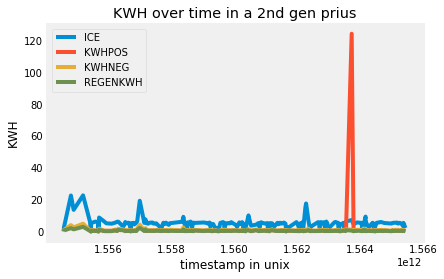

In [40]:
x = tripinfo_df['TIMESTAMP']
y = tripinfo_df['ICE_KWH']
y2 = tripinfo_df['KWHPOS']
y3 = tripinfo_df['KWHNEG']
y4 = tripinfo_df['REGENKWH']

fig, ax = plt.subplots()
ax.plot(x, y, label='ICE')
ax.plot(x, y2, label='KWHPOS')
ax.plot(x, y3, label='KWHNEG')
ax.plot(x, y4, label='REGENKWH')

ax.set(xlabel='timestamp in unix', ylabel='KWH', title='KWH over time in a 2nd gen prius')
ax.legend()
ax.grid()

plt.show()

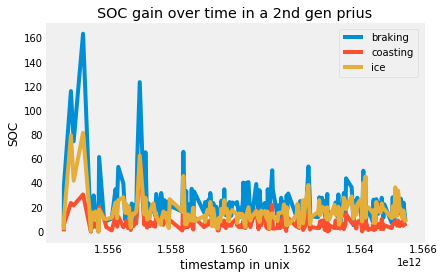

In [59]:
x = tripinfo_df['TIMESTAMP']
y = tripinfo_df['SOCGAINBRAKING']
y2 = tripinfo_df['SOCGAINCOASTING']
y3 = tripinfo_df['SOCGAINICE']
#y4 = tripinfo_df['REGENKWH']

fig, ax = plt.subplots()
ax.plot(x, y, label='braking')
ax.plot(x, y2, label='coasting')
ax.plot(x, y3, label='ice')
#ax.plot(x, y4, label='REGENKWH')

ax.set(xlabel='timestamp in unix', ylabel='SOC', title='SOC gain over time in a 2nd gen prius')
ax.legend()
ax.grid()

plt.show()

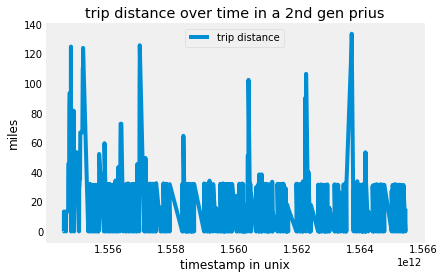

In [42]:
x = fastlog_df['TIMESTAMP']
y = fastlog_df['TRIP_DIST']
#y2 = tripinfo_df['KWHPOS']
#y3 = tripinfo_df['KWHNEG']
#y4 = tripinfo_df['REGENKWH']

fig, ax = plt.subplots()
ax.plot(x, y, label='trip distance')
#ax.plot(x, y2, label='KWHPOS')
#ax.plot(x, y3, label='KWHNEG')
#ax.plot(x, y4, label='REGENKWH')

ax.set(xlabel='timestamp in unix', ylabel='miles', title='trip distance over time in a 2nd gen prius')
ax.legend()
ax.grid()

plt.show()

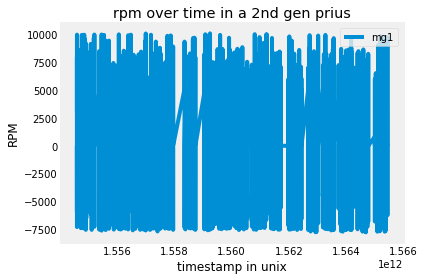

In [63]:
x = fastlog_df['TIMESTAMP']
y = fastlog_df['ICE_RPM']
y2 = fastlog_df['MG1_RPM']
y3 = fastlog_df['MG2_RPM']
y4 = fastlog_df['MGR_RPM']

fig, ax = plt.subplots()
#ax.plot(x, y, label='ice')
ax.plot(x, y2, label='mg1')
#ax.plot(x, y3, label='mg2')
#ax.plot(x, y4, label='mgr')

ax.set(xlabel='timestamp in unix', ylabel='RPM', title='rpm over time in a 2nd gen prius')
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

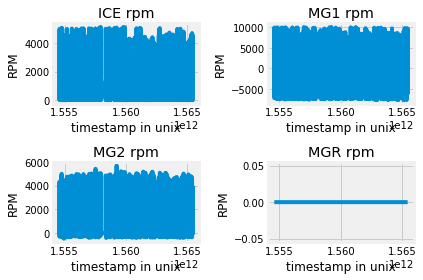

In [68]:
x = fastlog_df['TIMESTAMP']
y = fastlog_df['ICE_RPM']
y2 = fastlog_df['MG1_RPM']
y3 = fastlog_df['MG2_RPM']
y4 = fastlog_df['MGR_RPM']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(x, y, label='ice')
ax2.plot(x, y2, label='mg1')
ax3.plot(x, y3, label='mg2')
ax4.plot(x, y4, label='mgr')

ax1.set(xlabel='timestamp in unix', ylabel='RPM', title='ICE rpm')
ax2.set(xlabel='timestamp in unix', ylabel='RPM', title='MG1 rpm')
ax3.set(xlabel='timestamp in unix', ylabel='RPM', title='MG2 rpm')
ax4.set(xlabel='timestamp in unix', ylabel='RPM', title='MGR rpm')


plt.tight_layout()
plt.show()

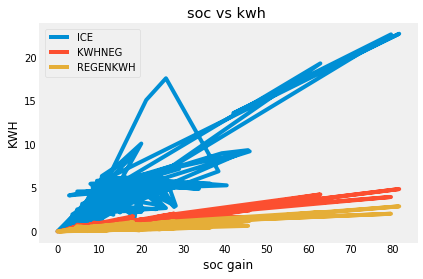

In [71]:
x = tripinfo_df['SOCGAINICE']
y = tripinfo_df['ICE_KWH']
y2 = tripinfo_df['KWHPOS']
y3 = tripinfo_df['KWHNEG']
y4 = tripinfo_df['REGENKWH']

fig, ax = plt.subplots()
ax.plot(x, y, label='ICE')
#ax.plot(x, y2, label='KWHPOS')
ax.plot(x, y3, label='KWHNEG')
ax.plot(x, y4, label='REGENKWH')

ax.set(xlabel='soc gain', ylabel='KWH', title='soc vs kwh ')
ax.legend()
ax.grid()

plt.show()

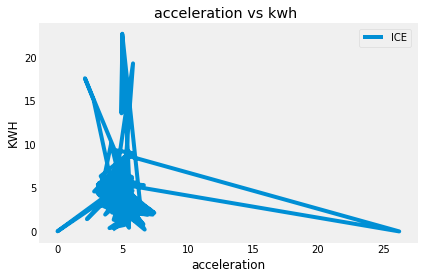

In [74]:
x = tripinfo_df['ACCELRATING']
y = tripinfo_df['ICE_KWH']
y2 = tripinfo_df['KWHPOS']
y3 = tripinfo_df['KWHNEG']
y4 = tripinfo_df['REGENKWH']

fig, ax = plt.subplots()
ax.plot(x, y, label='ICE')
#ax.plot(x, y2, label='KWHPOS')
#ax.plot(x, y3, label='KWHNEG')
#ax.plot(x, y4, label='REGENKWH')

ax.set(xlabel='acceleration', ylabel='KWH', title='acceleration vs kwh ')
ax.legend()
ax.grid()

plt.show()

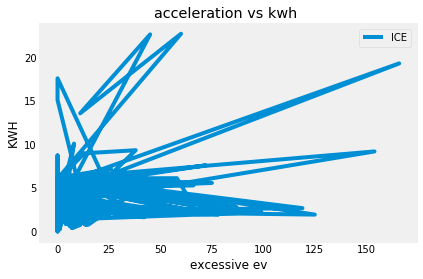

In [76]:
x = tripinfo_df['EXCESSIVE_EV']
y = tripinfo_df['ICE_KWH']
y2 = tripinfo_df['EXCESSIVE_EV']
y3 = tripinfo_df['KWHNEG']
y4 = tripinfo_df['REGENKWH']

fig, ax = plt.subplots()
ax.plot(x, y, label='ICE')
#ax.plot(x, y2, label='KWHPOS')
#ax.plot(x, y3, label='KWHNEG')
#ax.plot(x, y4, label='REGENKWH')

ax.set(xlabel='excessive ev', ylabel='KWH', title='acceleration vs kwh ')
ax.legend()
ax.grid()

plt.show()